In [1]:
import numpy as np
import pandas as pd


In [72]:

from itertools import product
from Bio import SeqIO
import os
import numpy as np
import pandas as pd
import pickle
from collections import Counter
from textwrap import wrap
from sklearn.feature_extraction import DictVectorizer

dir_data=r"d:\\github\\Bi4164---Moving-Ahead\\data_set"


os.chdir(dir_data)
fasta_sequences_neg = SeqIO.parse(open("negative.fa"), 'fasta')
fasta_sequences_pos = SeqIO.parse(open("positive.fa"), 'fasta')

def read_fasta(fasta_sequences_neg, fasta_sequences_pos):
    '''Returns a list of sequences and their corresponding genomic activities i.e., promoter or not
    
        Parameters
        ----------
        fasta_sequences_neg: class 'Bio.SeqIO.FastaIO.FastaIterator'
            The list of sequences that do not show promoter activity
        fasta_sequences_pos: class 'Bio.SeqIO.FastaIO.FastaIterator'
            The list of sequences that show promoter activity
        
        Returns
        -------
        list_of_sequences: list
            The list of combined negative and positive sequences
        list_of_ids: list
            The list of ids, which is whether the corresponding sequence has promoter activity or not'''
    
    list_of_sequences = []
    list_of_ids = []
    for fasta in fasta_sequences_neg:
        name, sequence = fasta.id, str(fasta.seq)
        list_of_sequences.append(sequence)
        list_of_ids.append('neg')
    for fasta in fasta_sequences_pos:
        name, sequence = fasta.id, str(fasta.seq)
        list_of_sequences.append(sequence)
        list_of_ids.append('pos')
    print('read_fasta has run!')
    return list_of_sequences, list_of_ids

def make_kmers(sequence, kmer_size):
    '''Returns the list of kmers for a particular sequence and size of kmer inputted by the user
    
        Parameters
        ----------
        sequence: string
            The sequence for which kmers are to be generated 
        kmer_size: int
            The size of the sliding window to generate kmers of that size
        
        Returns
        -------
        kmers: list
            The list of kmers for the sequence'''

    output= []
    for i in range(kmer_size):
        output+=wrap(sequence[i:], width=kmer_size)
    output= [i for i in output if len(i)==kmer_size]
    dict_output= Counter(output)
    return output, dict_output

def create_matrix_labels_given_order( order):
    
    nucleotides= ["A", "T", "G", "C"]
    counter=0
    if order==0:
        return ["NULL"]
    if order==1:
        return nucleotides
    else:
        past_output= create_matrix_labels_given_order(order-1)
        new_output= []
        for entries in past_output:
            for nucleotide in nucleotides:
                new_output.append(entries + nucleotide)
        return new_output

def get_vectors_for_all_sequences(sequences_list, kmer_size):
    
    v = DictVectorizer()
    keys_null= create_matrix_labels_given_order(kmer_size)
    values_null= np.zeros(shape= (len(keys_null)))
    dict_null= dict(zip(keys_null, values_null))
    D = [dict_null]
    for i in range(0, len(sequences_list)):
        kmers_for_sequence = dict(make_kmers(sequences[i], kmer_size)[1])
        D.append(kmers_for_sequence)
    print('kmers have been made and vectors acquired!')
    X = v.fit_transform(D)
    X= X[1:]
    return X, v
        
kmer_size = 6
sequences, ids = read_fasta(fasta_sequences_neg, fasta_sequences_pos)
# normalised_vectors_for_all_data = get_vectors_for_all_sequences(sequences, kmer_size)
# print(normalised_vectors_for_all_data[0])
# print(sequences[0])
# print(dict(make_kmers(sequences[0], kmer_size)[1]))
X, v= get_vectors_for_all_sequences(sequences, kmer_size)
onehot_ids= [1 if i=="pos" else 0 for i in ids]
y=onehot_ids

list_of_sequences = []
dir_data=r"d:\\github\\Bi4164---Moving-Ahead\\data_set"

os.chdir(dir_data)
fasta_sequences_test = SeqIO.parse(open("test.fa"), 'fasta')

for fasta in fasta_sequences_test:
    name, sequence = fasta.id, str(fasta.seq)
    list_of_sequences.append(sequence)
    
X_testing, v_testing= get_vectors_for_all_sequences(list_of_sequences, kmer_size)


read_fasta has run!
kmers have been made and vectors acquired!
kmers have been made and vectors acquired!


In [63]:
len(list_of_sequences[0])

79

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)

In [10]:
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB()
clf.fit(X_train, y_train)

BernoulliNB()

In [11]:
clf.score(X_test, y_test)

0.872439393939394

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn import datasets, metrics, model_selection, svm
import sklearn
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import precision_score

fold number: 0, precision test: 0.9002959912489544, precision train: 0.8998208203522252
[0.         0.09296814 1.        ] [0.         0.83949839 1.        ] [inf  1.  0.]


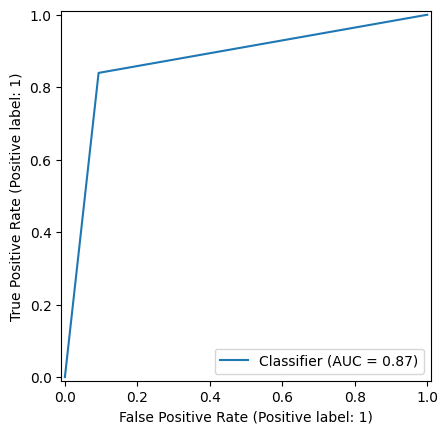

fold number: 1, precision test: 0.8997189286983491, precision train: 0.9003560438852282
[0.         0.09312093 1.        ] [0.         0.83545329 1.        ] [inf  1.  0.]


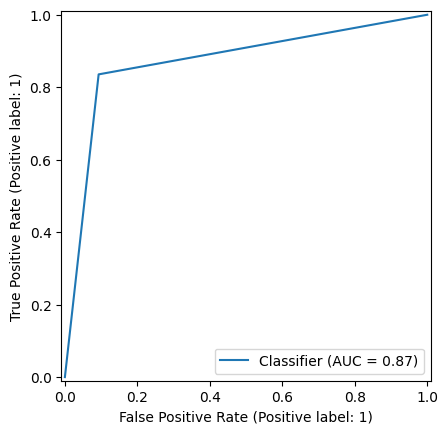

fold number: 2, precision test: 0.8953465920061788, precision train: 0.9001499202037625
[0.         0.09756098 1.        ] [0.         0.83466835 1.        ] [inf  1.  0.]


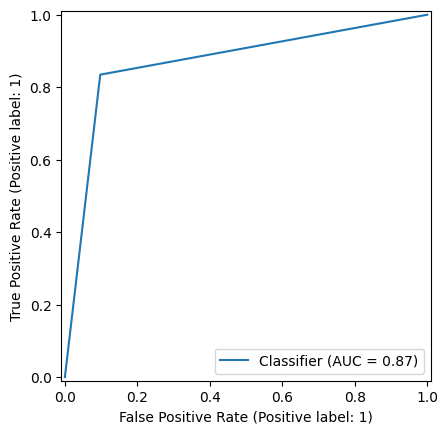

In [14]:
kf = StratifiedKFold(n_splits=3)
kf.get_n_splits(X, y)
# clf, clf_label= KNeighborsClassifier(n_jobs=4, n_neighbors=3), "knn"
clf = BernoulliNB()
# clf, clf_label= LogisticRegression(), "linear"
# clf, clf_label= RidgeClassifier(alpha= 1.0), "ridge"
# clf, clf_label= RidgeClassifier(alpha= 0.5), "ridge_0.5"
# X_test, Y_test, X_train, Y_train, Pred, Pred_train= [], [], [], [], [], []

for i, (train_index, test_index) in enumerate(kf.split(X, y)):
    
    x_train, x_test = X[train_index.astype(int)], X[test_index.astype(int)]
    y_train, y_test = np.array(y)[train_index.astype(int)], np.array(y)[test_index.astype(int)]
    clf.fit(x_train, y_train)
    
    y_pred = clf.predict(x_test)
    y_train_pred = clf.predict(x_train) 
    print(f"fold number: {i}, precision test: {precision_score(y_test, y_pred)}, precision train: {precision_score(y_train, y_train_pred)}")
    
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
    print(fpr, tpr, thresholds)
    # roc_auc = metrics.auc(fpr, tpr)
    
    RocCurveDisplay.from_predictions(y_test, y_pred)
    # display.plot()
    plt.show()

C:\Users\adity\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


fold number: 0, precision test: 0.9204383187434035, precision train: 0.9333748152757253
[0.         0.07688846 1.        ] [0.        0.8895389 1.       ] [inf  1.  0.]


C:\Users\adity\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


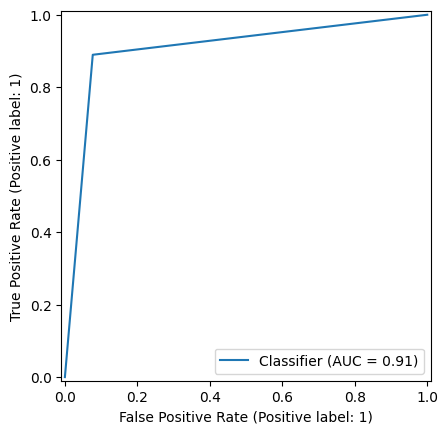

C:\Users\adity\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


fold number: 1, precision test: 0.9221484046037242, precision train: 0.9333913665262471
[0.         0.07488075 1.        ] [0.         0.88693226 1.        ] [inf  1.  0.]


C:\Users\adity\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


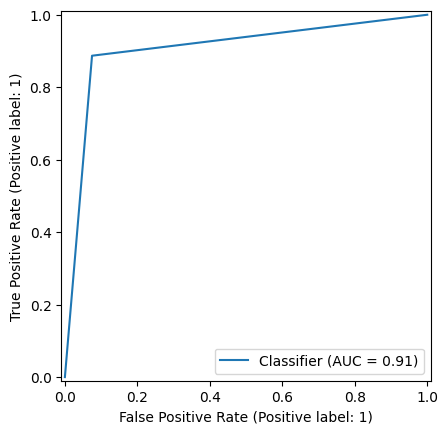

C:\Users\adity\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\adity\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


fold number: 2, precision test: 0.9195095452428993, precision train: 0.933515851040662
[0.         0.07779078 1.        ] [0.         0.88866889 1.        ] [inf  1.  0.]


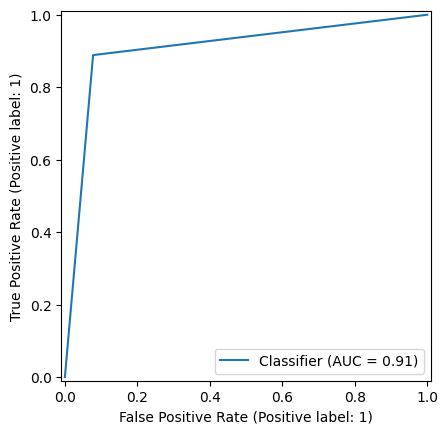

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV

for i, (train_index, test_index) in enumerate(kf.split(X, y)):
    svm = LinearSVC()
    clf = CalibratedClassifierCV(svm) 
    x_train, x_test = X[train_index.astype(int)], X[test_index.astype(int)]
    y_train, y_test = np.array(y)[train_index.astype(int)], np.array(y)[test_index.astype(int)]
    clf.fit(x_train, y_train)
    y_test= np.array([float(i) for i in y_test])
    y_pred = clf.predict(x_test)
    y_train_pred = clf.predict(x_train) 
    print(f"fold number: {i}, precision test: {precision_score(y_test, y_pred)}, precision train: {precision_score(y_train, y_train_pred)}")
    y_pred = clf.predict_proba(x_test)[:,1]
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
    print(fpr, tpr, thresholds)
    # roc_auc = metrics.auc(fpr, tpr)
    
    RocCurveDisplay.from_predictions(y_test, y_pred)
    # display.plot()
    plt.show()

In [16]:
for i, (train_index, test_index) in enumerate(kf.split(X, y)):
    print(i, train_index)

0 [ 33334  33335  33336 ... 199997 199998 199999]
1 [     0      1      2 ... 199997 199998 199999]
2 [     0      1      2 ... 166664 166665 166666]


In [17]:

from sklearn import tree

for i, (train_index, test_index) in enumerate(kf.split(X, y)):
    clf = tree.DecisionTreeClassifier()
    x_train, x_test = X[train_index.astype(int)], X[test_index.astype(int)]
    y_train, y_test = np.array(y)[train_index.astype(int)], np.array(y)[test_index.astype(int)]
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    y_train_pred = clf.predict(x_train) 
    print(y_pred)
    # print(f"fold number: {i}, precision test: {precision_score(y_test, y_pred)}, precision train: {precision_score(y_train, y_train_pred)}")
    
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
    print(fpr, tpr, thresholds)
    # roc_auc = metrics.auc(fpr, tpr)
    
    RocCurveDisplay.from_predictions(y_test, y_pred)
    # display.plot()
    plt.show()

: 

: 

In [ ]:
clf.score(x_test, y_test)

0.7519425194251943

In [ ]:
clf.predict(x_train)

array([0, 0, 0, ..., 1, 1, 1])

fold number: 0, precision test: 0.8991830012594052, precision train: 0.899433336553012
[0.         0.00101998 0.00113998 ... 0.99793004 1.         1.        ] [0.         0.13485135 0.1502715  ... 0.99997    0.99997    1.        ] [           inf 1.00000000e+00 1.00000000e+00 ... 8.57629477e-15
 8.00643397e-18 1.42624622e-18]


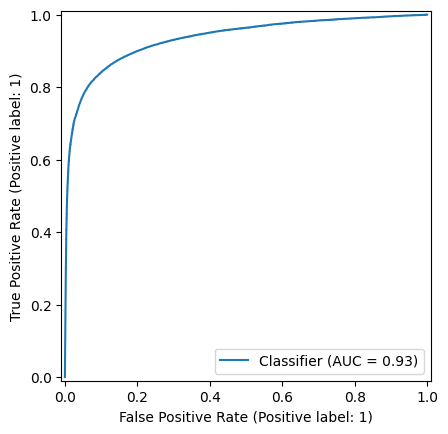

fold number: 1, precision test: 0.8973556917123509, precision train: 0.899908143039015
[0.00000000e+00 5.40005400e-04 6.90006900e-04 ... 9.99429994e-01
 1.00000000e+00 1.00000000e+00] [0.         0.13391732 0.15035699 ... 0.99997    0.99997    1.        ] [           inf 1.00000000e+00 1.00000000e+00 ... 2.67171975e-16
 3.44430359e-18 1.08878098e-19]


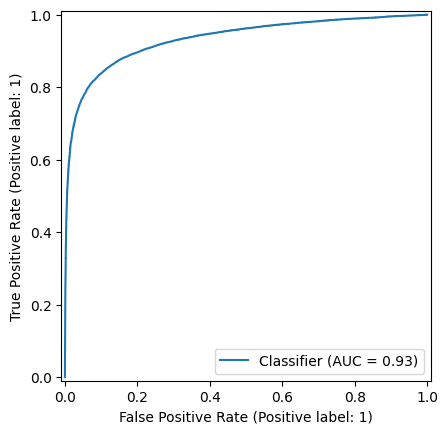

fold number: 2, precision test: 0.8997909631773597, precision train: 0.9002438591108025
[0.00000000e+00 9.00009000e-04 9.60009600e-04 ... 9.99909999e-01
 9.99909999e-01 1.00000000e+00] [0.         0.13104131 0.14718147 ... 0.99997    1.         1.        ] [           inf 1.00000000e+00 1.00000000e+00 ... 1.07123060e-16
 3.77691169e-17 1.00995236e-17]


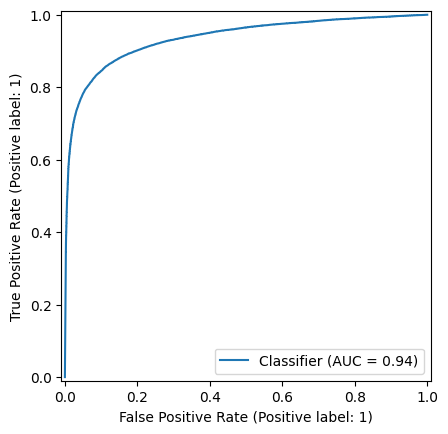

In [66]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import ComplementNB
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn import datasets, metrics, model_selection, svm
import sklearn
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import precision_score

kf = StratifiedKFold(n_splits=3, shuffle=True)
kf.get_n_splits(X, y)
# clf, clf_label= KNeighborsClassifier(n_jobs=4, n_neighbors=3), "knn"

# clf, clf_label= LogisticRegression(), "linear"
# clf, clf_label= RidgeClassifier(alpha= 1.0), "ridge"
# clf, clf_label= RidgeClassifier(alpha= 0.5), "ridge_0.5"
# X_test, Y_test, X_train, Y_train, Pred, Pred_train= [], [], [], [], [], []

for i, (train_index, test_index) in enumerate(kf.split(X, y)):
    clf = BernoulliNB()
    x_train, x_test = X[train_index.astype(int)], X[test_index.astype(int)]
    y_train, y_test = np.array(y)[train_index.astype(int)], np.array(y)[test_index.astype(int)]
    clf.fit(x_train, y_train)
    y_test= np.array([float(i) for i in y_test])
    y_pred = clf.predict(x_test)
    y_train_pred = clf.predict(x_train) 
    print(f"fold number: {i}, precision test: {precision_score(y_test, y_pred)}, precision train: {precision_score(y_train, y_train_pred)}")
    y_pred = clf.predict_proba(x_test)[:,1]
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
    print(fpr, tpr, thresholds)
    # roc_auc = metrics.auc(fpr, tpr)
    
    RocCurveDisplay.from_predictions(y_test, y_pred)
    # display.plot()
    plt.show()

In [34]:
dir_outputs=r"d:\\github\\Bi4164---Moving-Ahead\\model_outputs"
prob_testingFA= clf.predict(X_testing)
# neg_prob= prob_testingFA[:,0]
# pos_prob= prob_testingFA[:,1]
os.chdir(dir_outputs)
# np.save("linearSVC_negative_0_positive_1.npy", neg_prob)
# np.save("linearSVC_positive_posterior_prob.npy", pos_prob)

In [36]:
sum(prob_testingFA)

97

In [37]:
sum(neg_prob)

97

In [ ]:
def create_matrix_labels_given_order( order):
    
    nucleotides= ["A", "T", "G", "C"]
    counter=0
    if order==0:
        return ["NULL"]
    if order==1:
        return nucleotides
    else:
        past_output= create_matrix_labels_given_order(order-1)
        new_output= []
        for entries in past_output:
            for nucleotide in nucleotides:
                new_output.append(entries + nucleotide)
        return new_output

In [ ]:
len(create_matrix_labels_given_order(6))

4096

In [ ]:
keys_null= create_matrix_labels_given_order(kmer_size)
values_null= np.zeros(shape= (len(keys_null)))
dict_null= dict(zip(keys_null, values_null))


NameError: name 'kmer_size' is not defined

In [38]:
from sklearn.neighbors import KNeighborsClassifier
# clf = KNeighborsClassifier(n_neighbors=3)
kf = StratifiedKFold(n_splits=3)
kf.get_n_splits(X, y)
# clf, clf_label= KNeighborsClassifier(n_jobs=4, n_neighbors=3), "knn"
# clf = BernoulliNB()
# clf, clf_label= LogisticRegression(), "linear"
# clf, clf_label= RidgeClassifier(alpha= 1.0), "ridge"
# clf, clf_label= RidgeClassifier(alpha= 0.5), "ridge_0.5"
# X_test, Y_test, X_train, Y_train, Pred, Pred_train= [], [], [], [], [], []

for i, (train_index, test_index) in enumerate(kf.split(X, y)):
    clf = KNeighborsClassifier(n_neighbors=3)
    x_train, x_test = X[train_index.astype(int)], X[test_index.astype(int)]
    y_train, y_test = np.array(y)[train_index.astype(int)], np.array(y)[test_index.astype(int)]
    clf.fit(x_train, y_train)
    y_test= np.array([float(i) for i in y_test])
    y_pred = clf.predict(x_test)
    y_train_pred = clf.predict(x_train) 
    print(f"fold number: {i}, precision test: {precision_score(y_test, y_pred)}, precision train: {precision_score(y_train, y_train_pred)}")
    y_pred = clf.predict_proba(x_test)[:,1]
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
    print(fpr, tpr, thresholds)
    # roc_auc = metrics.auc(fpr, tpr)
    
    RocCurveDisplay.from_predictions(y_test, y_pred)
    # display.plot()
    plt.show()

KeyboardInterrupt: 

C:\Users\adity\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\adity\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adity\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\adity\AppData\Local\Packages\PythonSoftwareFoundation.Python.

fold number: 0, precision test: 0.9206344279595258, precision train: 0.9331664308261675


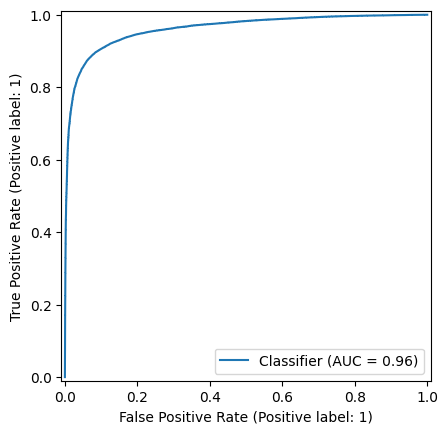

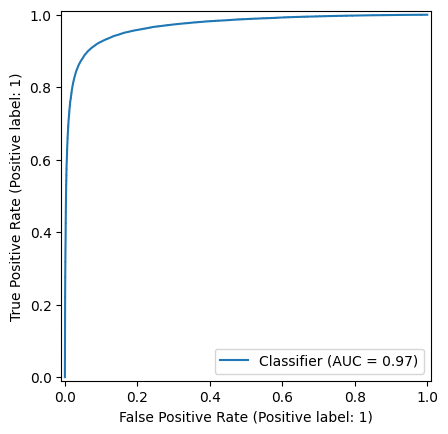

C:\Users\adity\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\adity\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adity\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\adity\AppData\Local\Packages\PythonSoftwareFoundation.Python.

fold number: 1, precision test: 0.9221099257595607, precision train: 0.933461819425232


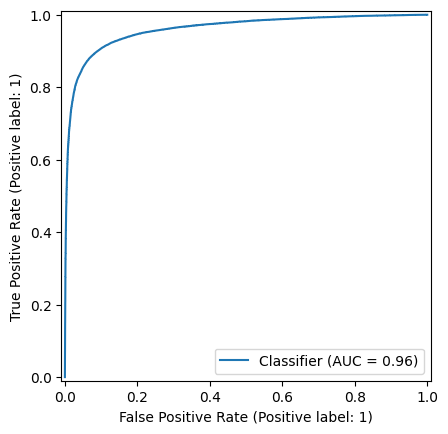

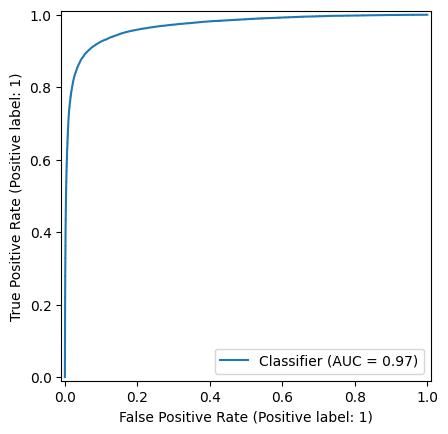

C:\Users\adity\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\adity\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adity\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\adity\AppData\Local\Packages\PythonSoftwareFoundation.Python.

fold number: 2, precision test: 0.9194464269091135, precision train: 0.9332763045337895


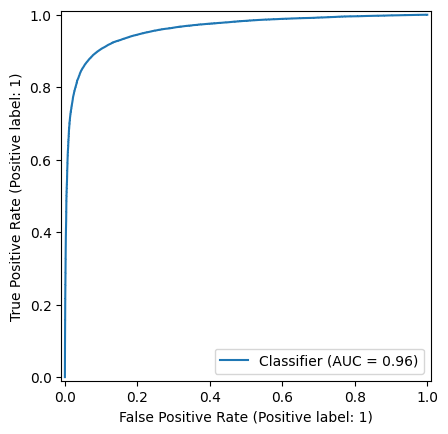

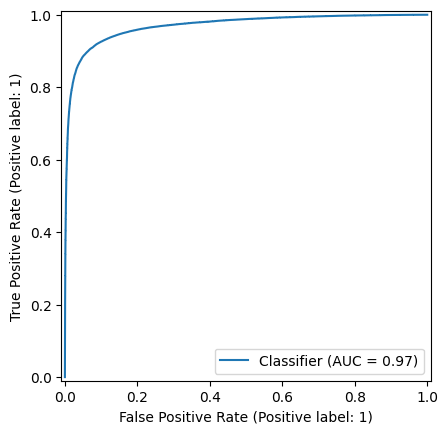

In [92]:
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV

for i, (train_index, test_index) in enumerate(kf.split(X, y)):
    svm = LinearSVC()
    clf = CalibratedClassifierCV(svm) 
    x_train, x_test = X[train_index.astype(int)], X[test_index.astype(int)]
    y_train, y_test = np.array(y)[train_index.astype(int)], np.array(y)[test_index.astype(int)]
    clf.fit(x_train, y_train)
    y_test= np.array([float(i) for i in y_test])
    y_pred = clf.predict(x_test)
    y_train_pred = clf.predict(x_train) 
    print(f"fold number: {i}, precision test: {precision_score(y_test, y_pred)}, precision train: {precision_score(y_train, y_train_pred)}")
    y_pred = clf.predict_proba(x_test)[:,1]
    y_pred_train = clf.predict_proba(x_train)[:,1]
    # fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
    # print(fpr, tpr, thresholds)
    # roc_auc = metrics.auc(fpr, tpr)
    
    RocCurveDisplay.from_predictions(y_test, y_pred)
    RocCurveDisplay.from_predictions(y_train, y_pred_train)
    # display.plot()
    plt.show()

In [ ]:
dir_outputs=r"d:\\github\\Bi4164---Moving-Ahead\\model_outputs"
prob_testingFA= clf.predict_proba(X_testing)
# neg_prob= prob_testingFA[:,0]
pos_prob= prob_testingFA[:,1]
os.chdir(dir_outputs)
# np.save("linearSVC_negative_0_positive_1.npy", neg_prob)
# np.save("linearSVC_positive_prob.npy", pos_prob)

In [ ]:
data = np.load('linearSVC_positive_prob.npy')
array= [1 if i>0.5 else 0 for i in data]
sum(array)

In [ ]:
model_outputs/neural_network_CNN_positive_prob

65

In [61]:
data = np.load('neural_network_CNN_positive_prob.npy')
data= [i[0] for i in data]
array= [1 if i>0.5 else 0 for i in data]
sum(array)
df= pd.DataFrame(columns=["values"])
df["values"]= data
df.to_csv("neural_network_CNN_positive_prob.csv")

In [60]:
data

array([[0.48911136],
       [0.47437385],
       [0.4844705 ],
       [0.47203964],
       [0.51834774],
       [0.4678215 ],
       [0.46792775],
       [0.47267088],
       [0.4798328 ],
       [0.47203964],
       [0.47267088],
       [0.47267088],
       [0.5264627 ],
       [0.4798328 ],
       [0.47640124],
       [0.47640124],
       [0.47267088],
       [0.47203964],
       [0.4896287 ],
       [0.47267088],
       [0.8444219 ],
       [0.47645822],
       [0.53965634],
       [0.47437385],
       [0.4798328 ],
       [0.47203964],
       [0.4798328 ],
       [0.4798328 ],
       [0.4798328 ],
       [0.4798328 ],
       [0.47267088],
       [0.47267088],
       [0.47437385],
       [0.47267088],
       [0.502194  ],
       [0.4871135 ],
       [0.47203964],
       [0.4798328 ],
       [0.4798328 ],
       [0.47267088],
       [0.47267088],
       [0.47267088],
       [0.4678215 ],
       [0.4798328 ],
       [0.4798328 ],
       [0.47203964],
       [0.47203964],
       [0.502

(array([  1.,   0.,   3.,   0.,   0.,   4.,   3.,   4.,  25., 960.]),
 array([59. , 61.1, 63.2, 65.3, 67.4, 69.5, 71.6, 73.7, 75.8, 77.9, 80. ]),
 <BarContainer object of 10 artists>)

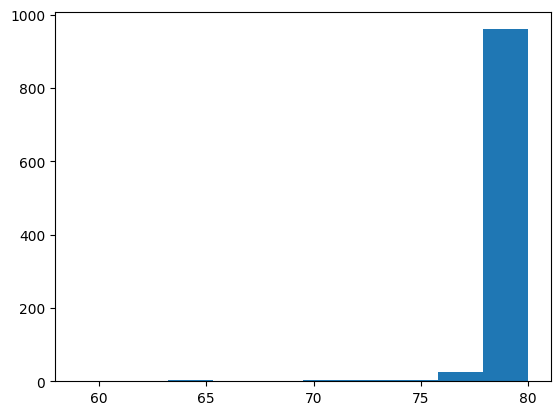

In [68]:
plt.hist([len(i) for i in list_of_sequences])

Permutation test

In [81]:
import random
def randomly_shuffle_labels(y):
    y_copy= y.copy()
    random.shuffle(y_copy)
    return y_copy

In [84]:
print(randomly_shuffle_labels(y))
y[-1]

[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 

1

In [86]:
precision_store= []
for it in range(1000):
    y_new= randomly_shuffle_labels(y)
    kf = StratifiedKFold(n_splits=3)
    kf.get_n_splits(X, y_new)
    
    for i, (train_index, test_index) in enumerate(kf.split(X, y)):
        clf = BernoulliNB()
        x_train, x_test = X[train_index.astype(int)], X[test_index.astype(int)]
        y_train, y_test = np.array(y_new)[train_index.astype(int)], np.array(y_new)[test_index.astype(int)]
        clf.fit(x_train, y_train)
        y_test= np.array([float(i) for i in y_test])
        y_pred = clf.predict(x_test)
        y_train_pred = clf.predict(x_train) 
        precision_store.append(precision_score(y_test, y_pred))


KeyboardInterrupt: 

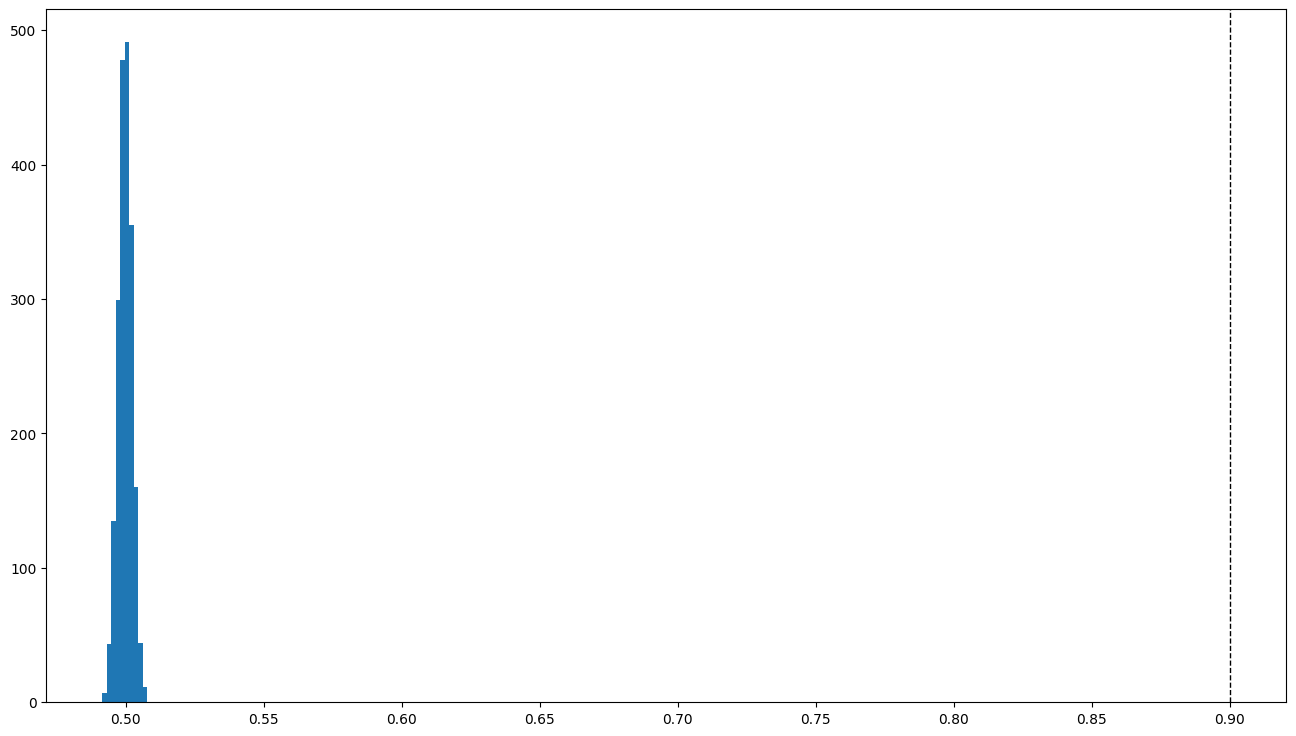

In [91]:
plt.figure(figsize=(16,9))
plt.hist(precision_store)
plt.axvline(0.900, color='k', linestyle='dashed', linewidth=1)